<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Trabajo_Analisis_de_Sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Análisis de Sentimientos

## Librerías

In [ ]:
!python --version

In [ ]:
!pip install snscrape

In [ ]:
!pip install snscrape

In [ ]:
!pip install emoji

In [52]:
#Extraer Tweets
import os
import pandas as pd
from datetime import date
#Extracción avanzada y DataFrame
import snscrape.modules.twitter as sntwitter
import itertools
import os
import pandas as pd
from datetime import date
#Fechas
from pytz import timezone
#Revision y limpieza
import tweepy
import json
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import collections
import csv
import numpy as np
import re
import plotly.express as px
from string import punctuation
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
import itertools
import emoji
#Bigramas
from nltk import bigrams
import networkx as nx
from nltk.util import ngrams
#Lematización
import spacy
#Bag of words
import gensim
from gensim import corpora

In [ ]:
!python -m spacy download es_core_news_sm

In [ ]:
!pip install pyLDAvis

## 1. Extracción de Tweets

Ver: https://github.com/igorbrigadir/twitter-advanced-search para más detalle de cómo hacer la consulta

Para este caso en particular, vamos a traernos datos previos a enero de este año, aprovechando que la fecha cuadra un poco con las fechas de ingreso y matrículas universitarias.

### EAFIT

In [55]:
scraped_tweets = sntwitter.TwitterSearchScraper("EAFIT lang:es near:'Medellín' within:20km since:2021-07-01 until:2022-01-30 -from:EAFIT").get_items()
sliced_scraped_tweets = itertools.islice(scraped_tweets, 4000)
dfeaf=pd.DataFrame(sliced_scraped_tweets)

In [56]:
dfeaf=pd.DataFrame(dfeaf,columns=['date', 'content', 'username'])
dfeaf

date  \
0    2022-01-29 22:20:33+00:00   
1    2022-01-29 22:06:49+00:00   
2    2022-01-29 21:36:02+00:00   
3    2022-01-29 21:24:35+00:00   
4    2022-01-29 20:45:32+00:00   
...                        ...   
3995 2021-11-10 23:06:16+00:00   
3996 2021-11-10 23:02:24+00:00   
3997 2021-11-10 23:01:18+00:00   
3998 2021-11-10 22:33:08+00:00   
3999 2021-11-10 22:25:57+00:00   

                                                content        username  
0     Este tipo es literalmente un idiota con una id...     elcurrucutu  
1     Bueno pero los economistas de la EAFIT no se q...      OhBuckey93  
2     Este fin de semana, inauguramos y dimos inicio...     EAFITSocial  
3     Y si estudiaste en EAFIT reee si https://t.co/...        IamGovea  
4     Pues yo no sé si “del pueblo”, pero si estamos...     valentinabz  
...                                                 ...             ...  
3995  Gracias EAFIT por estas arepas de queso tan ch...    Kenny__Bell_  
3996  @NatalyVelezL @Ninez_Ya @EAFIT Que decepción ....      scarleiva5  
3997  En nuestro próximo Seminario de asuntos públic...  GobiernoUAndes  
3998  @davidrramz Como parcha de bueno en eafit, si ...     juanes_garg  
3999  Clase abierta de Arbitraje Internacional con e...        josetoro  

[4000 rows x 3 columns]

In [57]:
result = dfeaf.groupby(by='username', as_index=False).agg({'content': pd.Series.nunique}).sort_values('content')
result = result.sort_values('content')

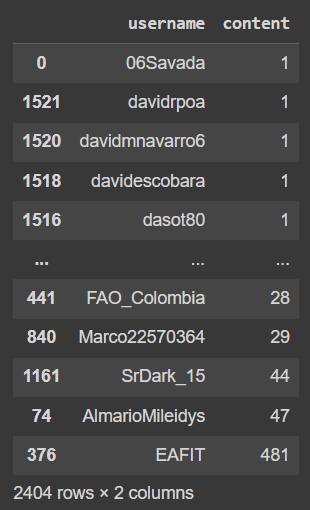

In [58]:
result

username  content
0            06_agggg        1
560      JavierALeonG        1
561   JavierB89770255        1
563      JavierMejiaC        1
576   JhonatanDucuar2        1
...               ...      ...
374     EliasChacon19       27
2359     vivirpoblado       27
1463         ehoyosce       33
983     SantiagoTobon       37
409    FelipeMurilloC       63

[2394 rows x 2 columns]

### UPB

In [59]:
scraped_tweets = sntwitter.TwitterSearchScraper("UPB lang:es near:'Medellín' within:20km since:2021-05-01 until:2022-01-30 -from:UPB_Drumer	-from:Upb_92i	 -from:UPBBGA	-from:upbcolombia -from:ESTACIONVUPB	-from:UPBGandia ").get_items()
sliced_scraped_tweets = itertools.islice(scraped_tweets, 4000)
dfupb=pd.DataFrame(sliced_scraped_tweets)

In [60]:
dfupb=pd.DataFrame(dfupb,columns=['date', 'content', 'username'])
dfupb

date  \
0    2022-01-29 19:28:57+00:00   
1    2022-01-29 12:58:54+00:00   
2    2022-01-29 12:34:52+00:00   
3    2022-01-29 04:16:03+00:00   
4    2022-01-29 03:48:24+00:00   
...                        ...   
3995 2021-05-04 00:28:58+00:00   
3996 2021-05-04 00:26:55+00:00   
3997 2021-05-04 00:24:59+00:00   
3998 2021-05-04 00:24:10+00:00   
3999 2021-05-04 00:20:47+00:00   

                                                content         username  
0     Para el que tenga dudas, @VongolaPrimoKHR ha p...  NoSponsorXManco  
1                         @Signor_UpB Auguri Mister BSu            Fl3b0  
2     @lilivasquezcom @UdeA @UdeMedellin_ @UPB Semes...       martharol9  
3     La UPB presenta proyecto junto a la Universida...         EducaBol  
4     #RCBolivia\nLa UPB anunció el proyecto: "Una p...        rcbolivia  
...                                                 ...              ...  
3995  Esta Asamblea está mostrando el nivel tan baji...      theclownnie  
3996         no mk que ridiculez esa asamblea de la upb        nealohice  
3997  Que es más inútil \n\nLa asamblea de la UPB o ...       salpicones  
3998  no mk, paren con las cosas de upb que me entra...      labuenapapi  
3999  La Upb siempre ha tenido asamblea?\nMe di cuen...         mustipss  

[4000 rows x 3 columns]

In [61]:
result = dfupb.groupby(by='username', as_index=False).agg({'content': pd.Series.nunique}).sort_values('content')
result = result.sort_values('content')

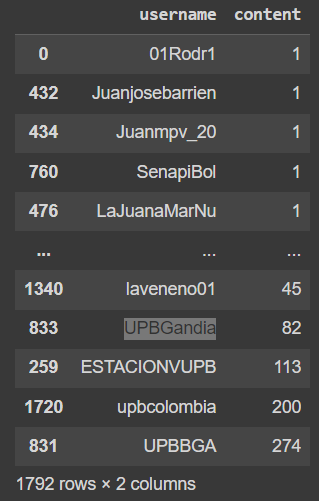

In [62]:
result

username  content
0           002Correa        1
194     Canalmonteria        1
583     LaOtraNatalia        1
584       LaPrensaWeb        1
193   Canal_BoliviaTV        1
...               ...      ...
779   NoSponsorXManco       30
1629  juancuestajurad       30
2101       upbfbradio       36
1982        saforguia       40
1401         diabetao       47

[2192 rows x 2 columns]

### UdeA

In [63]:
scraped_tweets = sntwitter.TwitterSearchScraper("UdeA lang:es near:'Medellín' within:20km since:2021-06-30 until:2022-01-30 -from:educacion_udea -from:afidro_udea -from:Medicina_UdeA -from:UdeA -from:emisoraudea").get_items()
sliced_scraped_tweets = itertools.islice(scraped_tweets, 4000)
dfudea=pd.DataFrame(sliced_scraped_tweets)

In [64]:
dfudea=pd.DataFrame(dfudea,columns=['date', 'content', 'username'])
dfudea

date  \
0    2022-01-29 22:27:59+00:00   
1    2022-01-29 22:27:14+00:00   
2    2022-01-29 22:26:09+00:00   
3    2022-01-29 22:25:48+00:00   
4    2022-01-29 22:25:40+00:00   
...                        ...   
3995 2021-11-27 02:40:18+00:00   
3996 2021-11-27 01:58:07+00:00   
3997 2021-11-26 23:47:10+00:00   
3998 2021-11-26 23:39:30+00:00   
3999 2021-11-26 22:37:22+00:00   

                                                content         username  
0     @Aladerechaxmpre @GarantiasPSG @UdeA @CiudadMo...     ConradoMora1  
1     @Horunzhaya_RT @GarantiasPSG @UdeA @CiudadMovC...     ConradoMora1  
2     @Aladerechaxmpre @GarantiasPSG @UdeA @CiudadMo...     ConradoMora1  
3     @FabinCeballos11 @GarantiasPSG @UdeA @CiudadMo...     ConradoMora1  
4     @gbarrera29twt @FabinCeballos11 @GarantiasPSG ...     ConradoMora1  
...                                                 ...              ...  
3995  Primeras estaciones #CoastSnap de Colombia. Mo...      Alfredo__JV  
3996  Estoy muy feeeeliiiz. Ya compré el pin de rein...   YakieOrejarena  
3997  #Medellín Con movilización por la vida, foros ...     MisionONUCol  
3998  @petrogustavo Luis Pérez es un cacique cliente...  ivanmontenegrot  
3999  @CarlosFGalan @sergio_fajardo Pues me toca rec...  ngellva70736335  

[4000 rows x 3 columns]

In [65]:
result = dfudea.groupby(by='username', as_index=False).agg({'content': pd.Series.nunique}).sort_values('content')
result = result.sort_values('content')

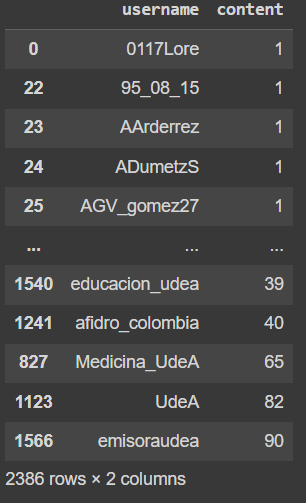

In [66]:
result

username  content
0              002jac        1
2548      yesepalacio        1
19        ADecolonial        1
20       AGUDELOSDVSF        1
21           AGonza97        1
...               ...      ...
265      Corantioquia       19
433   FIngenieriaUdeA       25
1660       europa_sur       31
414     Esc_Ambiental       31
2480          udeismo       58

[2561 rows x 2 columns]

### Comprobación

In [67]:
dfupb.iloc[1000]

date                           2021-11-19 03:35:38+00:00
content     @ruiz_rpo Paola Andrea algo lol es de la UPB
username                                    NataliaV1401
Name: 1000, dtype: object

In [68]:
dfeaf.iloc[1000]

date                                2022-01-12 20:41:12+00:00
content     EAFIT es grupo GEA. TODOS SUS AUXILIOS VAN PAR...
username                                        rescoldototal
Name: 1000, dtype: object

In [69]:
dfudea.iloc[1000]

date                                2022-01-15 20:19:23+00:00
content     @PolitecnicoJIC @UdeA @UNALmedellin ¿Por qué s...
username                                         garciasmateo
Name: 1000, dtype: object

### Conversion de fecha y guardado del documento.

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
dfeaf['date'] = dfeaf.date.dt.tz_convert('America/Bogota')
dfupb['date'] = dfupb.date.dt.tz_convert('America/Bogota')
dfudea['date'] = dfudea.date.dt.tz_convert('America/Bogota')

In [26]:
path='/content/drive/MyDrive/Trabajo_analisis_sentimiento/'
dfeaf.to_csv(path+'eafit.csv')
dfupb.to_csv(path+'upb.csv')
dfudea.to_csv(path+'udea.csv')

## 2. Revisión de los datos

### Repeticion menciones

Queremos observar las menciones más comunes de este periodo para cada una de las 3 universidades.

In [71]:
dfeaf['content'].str.contains(r'#\w+')

0       False
1       False
2        True
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Name: content, Length: 4000, dtype: bool

In [72]:
screen_names_list=dfeaf['content'].str.findall(r"#\w+").sum()# Aplanar la lista
screen_names = set(dfeaf['content'].str.findall(r"#\w+").sum())
screen_names

{'#0DS',
 '#10añosurbam',
 '#11CongresoPactoGlobal',
 '#123porlaCiencia',
 '#2021',
 '#2022',
 '#30añosVivirenElPoblado',
 '#4U',
 '#ACerrarBrechas',
 '#AEstaHora',
 '#ALaMierdaTilin',
 '#ANDIDigitalyServicios',
 '#ASCUN',
 '#Administración',
 '#AgendaCultural',
 '#AlAire',
 '#Alerta',
 '#Alianza4U',
 '#Amigosurbam',
 '#Antioquia',
 '#AntioquiaOptimista',
 '#AnálisisUNAL',
 '#AprenderPorElPlaneta',
 '#AprendizajeServicio',
 '#AvanzamosRionegro',
 '#BCB',
 '#BID',
 '#BancoMundial',
 '#Bancolombia',
 '#BienestarEAFIT',
 '#BioAnorí',
 '#BioExpo2021',
 '#BostonScientific',
 '#CIIETec2021',
 '#COP',
 '#CSR',
 '#CambioClimatico',
 '#Casaurbam',
 '#Caucasia',
 '#CausaJustaPorElAborto',
 '#CeroDemagogia',
 '#CervicalCancer',
 '#Ciencia',
 '#ClaudiaRestrepo',
 '#Clubdeseries',
 '#Colombia',
 '#ColombiaEstáAlAire',
 '#ColombiaTieneFuturo',
 '#Columna',
 '#ComPol',
 '#ComPolEAFIT',
 '#Comuna13',
 '#ComunicaciónPolitica',
 '#ComunidadesSostenibles',
 '#ConElCorazón',
 '#Concreto',
 '#ConoceATusPro

In [73]:
teaf = pd.DataFrame()
for name in screen_names:
  teaf[name.replace('#', '')] = dfeaf['content'].str.contains(name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
dfupb['content'].str.contains(r'#\w+')

0       False
1       False
2       False
3       False
4        True
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Name: content, Length: 4000, dtype: bool

In [75]:
screen_names1_list=dfupb['content'].str.findall(r"#\w+").sum()# Aplanar la lista
screen_names1 = set(dfupb['content'].str.findall(r"#\w+").sum())
screen_names1

{'#1',
 '#13',
 '#14',
 '#20julio',
 '#21años',
 '#28S',
 '#30AñosDeLaConstitución',
 '#5agosto',
 '#75DA',
 '#9DeJulio',
 '#AEstaHora',
 '#AHORA',
 '#AI',
 '#ANF',
 '#ASINTUPB',
 '#ATENCIÓN',
 '#AestaHora',
 '#AfiliadoCCOA',
 '#AfiliadoClientePreferencial',
 '#AguasNegras',
 '#Ahora',
 '#AjayuDigital',
 '#AkınAkınözü',
 '#AlAire',
 '#ArcoZaragoza',
 '#Arquidiseno',
 '#Atencion',
 '#Atención',
 '#Atletismo',
 '#Avanzamos',
 '#Avatar35',
 '#BALONCESTO',
 '#BOGOTA',
 '#BOLIVIA',
 '#BUCARAMANGA',
 '#Badajoz',
 '#Baloncesto',
 '#Basket',
 '#Bastardo',
 '#BatteryTwitter',
 '#BelénMalibú',
 '#Besitos',
 '#Bienestar',
 '#Biointropic',
 '#Bioparche',
 '#BoletinesUAM',
 '#Bolivia',
 '#Bolivianos',
 '#BolivianosInformando',
 '#Bucaramanga',
 '#Business',
 '#CARIBEHOY',
 '#CEGIE',
 '#CIAU',
 '#CIAUPodcastsUrbanosSeries',
 '#CIDET',
 '#CIICA',
 '#CONCURSO',
 '#COP26',
 '#COVID',
 '#COVID19',
 '#CUT',
 '#Campus',
 '#CampusUPBGA',
 '#CanalMontería',
 '#Cemal',
 '#Centrodeidiomas',
 '#CertificaciónIn

In [76]:
tupb = pd.DataFrame()
for name in screen_names1:
  tupb[name.replace('#', '')] = dfupb['content'].str.contains(name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
dfudea['content'].str.contains(r'#\w+')

0       False
1       False
2       False
3       False
4       False
        ...  
3995     True
3996    False
3997     True
3998    False
3999    False
Name: content, Length: 4000, dtype: bool

In [78]:
screen_names2_list=dfudea['content'].str.findall(r"#\w+").sum()# Aplanar la lista
screen_names2 = set(dfudea['content'].str.findall(r"#\w+").sum())
screen_names2

{'#1',
 '#13Contamos',
 '#2',
 '#28E',
 '#3',
 '#4',
 '#5',
 '#52',
 '#5AñosPorLaPaz',
 '#ACPMT',
 '#AEstaHora',
 '#AGN',
 '#AMOVI',
 '#APH',
 '#ATENCION',
 '#ATENCIÓN',
 '#AVA',
 '#Actualidad',
 '#ActualizateconFINUT',
 '#AcuerdoDePaz',
 '#AcuerdodeEscazú',
 '#Admisiones2022',
 '#AgendaCIAP',
 '#AlAire',
 '#AlejandroFernandez',
 '#Alerta',
 '#Algeciras',
 '#Allergy',
 '#AlmaMater',
 '#AlmaMáter',
 '#AmoMiAlmaMater',
 '#Anorí',
 '#Antioquia',
 '#Antioquia2040',
 '#AntioquiaTeCuenta',
 '#AntioquiaesMágica',
 '#Antioquiaesmágica',
 '#AntójateDeAntioquia',
 '#AquinoAlCongreso',
 '#AquinoPrimero',
 '#Arboletes',
 '#AsiPaso',
 '#Asíparticipamos',
 '#Atención',
 '#AtletismoUdeA',
 '#AyúdanosACuidarte',
 '#BALONCESTO',
 '#BTS',
 '#Baloncesto',
 '#Balonmano',
 '#BecaLideresdeOro',
 '#Becas',
 '#BecasLíderesdeOro',
 '#BermúdezLeInforma',
 '#BermúdezSonResultados',
 '#Biologia',
 '#Biología',
 '#Bióloga',
 '#Bloque13',
 '#BolTéX',
 '#BomberosMedellín',
 '#BuenosYGuapos',
 '#CALI',
 '#CCFlorida',

In [79]:
tudea = pd.DataFrame()
for name in screen_names1:
  tudea[name.replace('#', '')] = dfudea['content'].str.contains(name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


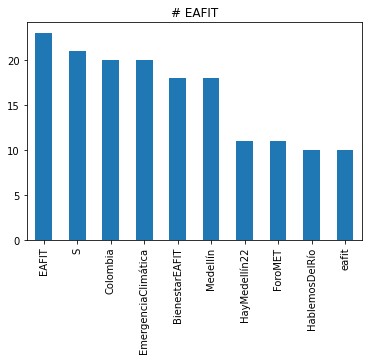

In [80]:
name_counts = teaf.sum(axis=0).sort_values(ascending=False)
name_counts[0:10].plot.bar(title = '# EAFIT')

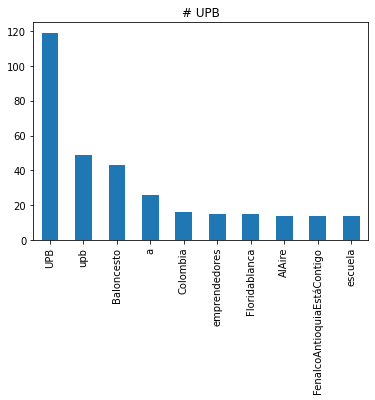

In [81]:
name_counts1 = tupb.sum(axis=0).sort_values(ascending=False)
name_counts1[0:10].plot.bar(title = '# UPB')

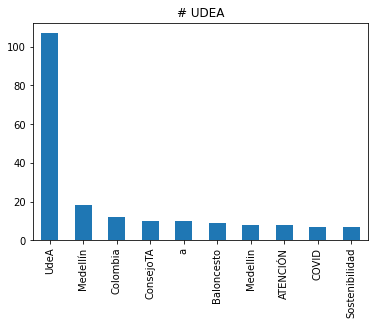

In [82]:
name_counts2 = tudea.sum(axis=0).sort_values(ascending=False)
name_counts2[0:10].plot.bar(title = '# UDEA')

### Limpieza de Texto

In [83]:
from string import punctuation
def  clean_text(df, text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Convertir a minúscula
  df[text_field] = df[text_field].str.lower()
  #URL e Email
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))  
  #Hashtags y menciones
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  #Greater Than y Lesser Than
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(\&gt\;)|(\&lt\;)','', elem))
  #Eliminar horas
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(a\.m)|(p\.m)','', elem))
  #Eliminar números
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  #Sustitución de espacio ocioso
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  #Signos de puntuación
  non_words = list(punctuation)
  non_words.extend(['¿', '¡', '‘', '’', '”','“'])
  df[text_field] = df[text_field].apply(lambda elem: ''.join([c for c in elem if c not in non_words]))
  return df

Primero hacemos una limpieza general.

In [84]:
eafc = clean_text(dfeaf, 'content')
upbc = clean_text(dfupb, 'content')
udeac = clean_text(dfudea, 'content')

Ahora agregamos las stopwords a la limpieza.

In [85]:
nltk.download('stopwords')
stop = stopwords.words('spanish')
stop.extend(['pues','si','pa','cómo','q','ma', 'así', 'am', 'pm'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
eafc['content'] = eafc['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
upbc['content'] = upbc['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
udeac['content'] = udeac['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### Revisión de Palabras

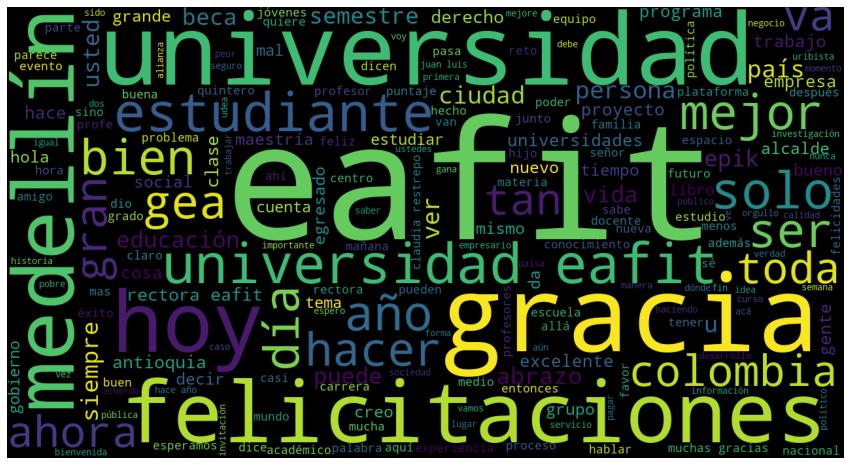

In [87]:
text = ' '.join(txt for txt in eafc['content'])
wordcloud = WordCloud(width=1280, height=690).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

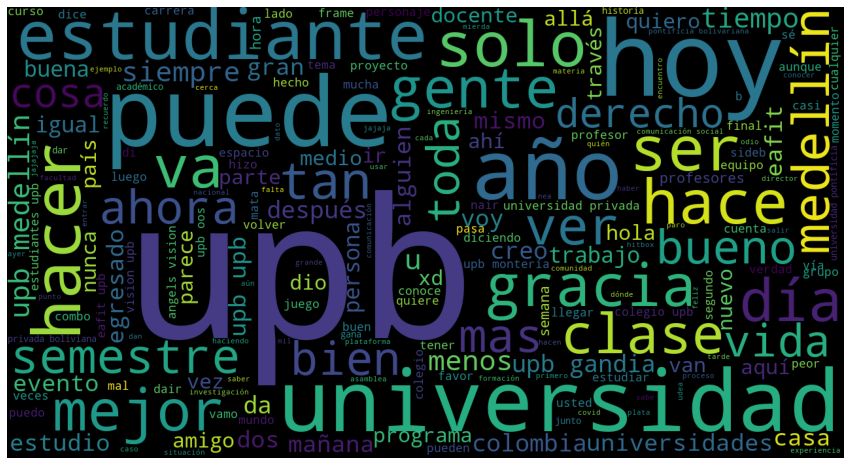

In [88]:
text = ' '.join(txt for txt in upbc['content'])
wordcloud = WordCloud(width=1280, height=690).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

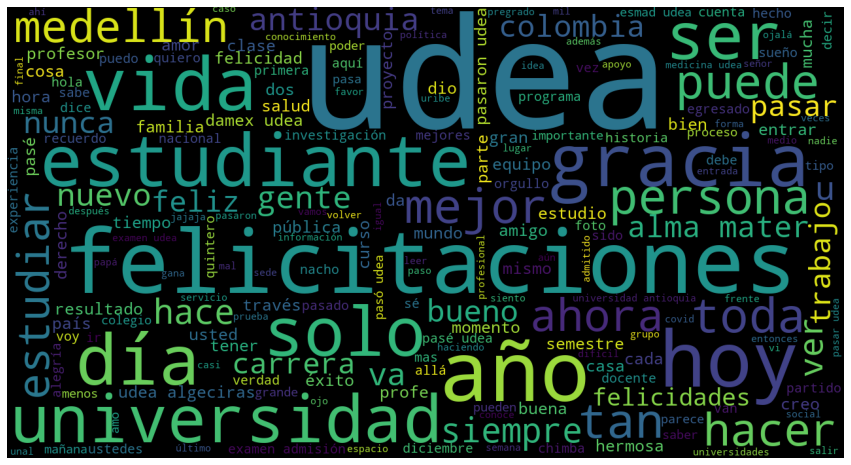

In [89]:
text = ' '.join(txt for txt in udeac['content'])
wordcloud = WordCloud(width=1280, height=690).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

### Limpieza de Emojis

In [90]:
def remove_emoji(text):
  return emoji.replace_emoji(text,'')

Creo una copia de seguridad para eliminar los emojis

In [91]:
eafse = eafc.copy()
upbse = upbc.copy()
udease = udeac.copy()

In [92]:
eafse['content']=eafse['content'].apply(lambda text: remove_emoji(text))
upbse['content']=upbse['content'].apply(lambda text: remove_emoji(text))
udease['content']=udease['content'].apply(lambda text: remove_emoji(text))

### Tokenización

In [93]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Tokenizo tanto los DF con y sin Emojis.

In [94]:
eafc['tokens'] = eafc['content'].apply(lambda x: word_tokenize(x))
upbc['tokens'] = upbc['content'].apply(lambda x: word_tokenize(x))
udeac['tokens'] = udeac['content'].apply(lambda x: word_tokenize(x))

In [95]:
eafse['tokens'] = eafse['content'].apply(lambda x: word_tokenize(x))
upbse['tokens'] = upbse['content'].apply(lambda x: word_tokenize(x))
udease['tokens'] = udease['content'].apply(lambda x: word_tokenize(x))

In [96]:
pe = list(itertools.chain(*eafc['tokens']))
counts_words = collections.Counter(pe)
mostcommon_words=counts_words.most_common(15)
mostcommon_words

[('eafit', 1266),
 ('universidad', 431),
 ('gracias', 348),
 ('felicitaciones', 232),
 ('medellín', 209),
 ('hoy', 177),
 ('rectora', 162),
 ('ser', 151),
 ('hace', 121),
 ('solo', 119),
 ('hacer', 115),
 ('estudiantes', 110),
 ('mejor', 108),
 ('bien', 108),
 ('años', 99)]

In [97]:
pu = list(itertools.chain(*upbc['tokens']))
counts_words = collections.Counter(pu)
mostcommon_words=counts_words.most_common(15)
mostcommon_words

[('upb', 3529),
 ('universidad', 245),
 ('hoy', 187),
 ('ser', 147),
 ('estudiantes', 145),
 ('hacer', 142),
 ('medellín', 140),
 ('años', 122),
 ('puede', 118),
 ('solo', 118),
 ('gracias', 117),
 ('mejor', 116),
 ('hace', 113),
 ('gente', 91),
 ('eafit', 91)]

In [98]:
pa = list(itertools.chain(*udeac['tokens']))
counts_words = collections.Counter(pa)
mostcommon_words=counts_words.most_common(15)
mostcommon_words

[('udea', 1898),
 ('felicitaciones', 199),
 ('universidad', 174),
 ('ser', 163),
 ('gracias', 155),
 ('hoy', 151),
 ('vida', 131),
 ('gente', 126),
 ('ver', 118),
 ('años', 116),
 ('solo', 113),
 ('tan', 111),
 ('alma', 104),
 ('año', 104),
 ('mejor', 103)]

Observemos si quedaron bien las conversiones.

In [99]:
eafc.head(25)

date  \
0  2022-01-29 17:20:33-05:00   
1  2022-01-29 17:06:49-05:00   
2  2022-01-29 16:36:02-05:00   
3  2022-01-29 16:24:35-05:00   
4  2022-01-29 15:45:32-05:00   
5  2022-01-29 15:25:02-05:00   
6  2022-01-29 14:40:25-05:00   
7  2022-01-29 14:09:06-05:00   
8  2022-01-29 13:53:16-05:00   
9  2022-01-29 13:33:37-05:00   
10 2022-01-29 13:14:22-05:00   
11 2022-01-29 10:42:30-05:00   
12 2022-01-29 10:11:13-05:00   
13 2022-01-29 09:47:29-05:00   
14 2022-01-29 09:47:15-05:00   
15 2022-01-29 09:42:10-05:00   
16 2022-01-29 09:35:02-05:00   
17 2022-01-29 09:32:00-05:00   
18 2022-01-29 09:31:12-05:00   
19 2022-01-29 09:16:57-05:00   
20 2022-01-29 09:00:48-05:00   
21 2022-01-29 09:00:01-05:00   
22 2022-01-29 08:31:35-05:00   
23 2022-01-29 08:01:28-05:00   
24 2022-01-29 07:54:30-05:00   

                                              content         username  \
0   tipo literalmente idiota ideota ademas atencio...      elcurrucutu   
1   bueno economistas eafit quedan atrás diciendo ...       OhBuckey93   
2   fin semana inauguramos dimos inicio nueva coho...      EAFITSocial   
3                               estudiaste eafit reee         IamGovea   
4   sé pueblo diciendo pueblo significa volanteo p...      valentinabz   
5   acaso eafit mejor universidad permitiendo ingr...   valeriatamayoa   
6   via don diego rionegro municipio rionegro altu...          Devimed   
7   asistieron charla conceptuan respecto eventoll...   Mauroabogado74   
8   espero va decir estudiante eafit jajajajajajja...       Henry_kpri   
9           mk todas amigas salieron eafit mevoamatar      lasuyamirey   
10  via don diego rionegro municipio rionegro altu...          Devimed   
11  muchas gracias camilo esfuerzo colectivo apoyo...    FedericoHoyos   
12            amiga robado morral carpita eafit parte    withansnotanz   
13  ve ayer dónde soñando crear líderes solo viven...          celulo1   
14  parque explora invita disfrutar conversación a...    ParqueExplora   
15          quién hablando dónde vamos jorge melguizo  arturoarangocru   
16                                              eafit    SociologoAzul   
17  ciudad casi mitad año episodios calor extremo ...       berriondo1   
18                estudiante eafit estresa día check✅        mona_2335   
19                               cuadrado medio eafit         laumelzg   
20  covid 💰 finanzas públicas colombia posible red...  BancoMundialLAC   
21  hablemos 👉 colombia próximo martes junto banco...        FEG_EAFIT   
22  excelente conocer avances programa gracias com...         eatehort   
23  llorenlo uribistas pudieron tumbar quintero 😆😆😆😆😆      WillieRojas   
24                                         regreso 💪🏼  nestormartinezj   

                                               tokens  
0   [tipo, literalmente, idiota, ideota, ademas, a...  
1   [bueno, economistas, eafit, quedan, atrás, dic...  
2   [fin, semana, inauguramos, dimos, inicio, nuev...  
3                           [estudiaste, eafit, reee]  
4   [sé, pueblo, diciendo, pueblo, significa, vola...  
5   [acaso, eafit, mejor, universidad, permitiendo...  
6   [via, don, diego, rionegro, municipio, rionegr...  
7   [asistieron, charla, conceptuan, respecto, eve...  
8   [espero, va, decir, estudiante, eafit, jajajaj...  
9    [mk, todas, amigas, salieron, eafit, mevoamatar]  
10  [via, don, diego, rionegro, municipio, rionegr...  
11  [muchas, gracias, camilo, esfuerzo, colectivo,...  
12     [amiga, robado, morral, carpita, eafit, parte]  
13  [ve, ayer, dónde, soñando, crear, líderes, sol...  
14  [parque, explora, invita, disfrutar, conversac...  
15   [quién, hablando, dónde, vamos, jorge, melguizo]  
16                                            [eafit]  
17  [ciudad, casi, mitad, año, episodios, calor, e...  
18          [estudiante, eafit, estresa, día, check✅]  
19                           [cuadrado, medio, eafit]  
20  [covid, 💰, finanzas, públicas, colombia, posib...  
21  [hablemos, 👉, colombia, próxim

In [100]:
eafse.head(25)

date  \
0  2022-01-29 17:20:33-05:00   
1  2022-01-29 17:06:49-05:00   
2  2022-01-29 16:36:02-05:00   
3  2022-01-29 16:24:35-05:00   
4  2022-01-29 15:45:32-05:00   
5  2022-01-29 15:25:02-05:00   
6  2022-01-29 14:40:25-05:00   
7  2022-01-29 14:09:06-05:00   
8  2022-01-29 13:53:16-05:00   
9  2022-01-29 13:33:37-05:00   
10 2022-01-29 13:14:22-05:00   
11 2022-01-29 10:42:30-05:00   
12 2022-01-29 10:11:13-05:00   
13 2022-01-29 09:47:29-05:00   
14 2022-01-29 09:47:15-05:00   
15 2022-01-29 09:42:10-05:00   
16 2022-01-29 09:35:02-05:00   
17 2022-01-29 09:32:00-05:00   
18 2022-01-29 09:31:12-05:00   
19 2022-01-29 09:16:57-05:00   
20 2022-01-29 09:00:48-05:00   
21 2022-01-29 09:00:01-05:00   
22 2022-01-29 08:31:35-05:00   
23 2022-01-29 08:01:28-05:00   
24 2022-01-29 07:54:30-05:00   

                                              content         username  \
0   tipo literalmente idiota ideota ademas atencio...      elcurrucutu   
1   bueno economistas eafit quedan atrás diciendo ...       OhBuckey93   
2   fin semana inauguramos dimos inicio nueva coho...      EAFITSocial   
3                               estudiaste eafit reee         IamGovea   
4   sé pueblo diciendo pueblo significa volanteo p...      valentinabz   
5   acaso eafit mejor universidad permitiendo ingr...   valeriatamayoa   
6   via don diego rionegro municipio rionegro altu...          Devimed   
7   asistieron charla conceptuan respecto eventoll...   Mauroabogado74   
8   espero va decir estudiante eafit jajajajajajja...       Henry_kpri   
9           mk todas amigas salieron eafit mevoamatar      lasuyamirey   
10  via don diego rionegro municipio rionegro altu...          Devimed   
11  muchas gracias camilo esfuerzo colectivo apoyo...    FedericoHoyos   
12            amiga robado morral carpita eafit parte    withansnotanz   
13  ve ayer dónde soñando crear líderes solo viven...          celulo1   
14  parque explora invita disfrutar conversación a...    ParqueExplora   
15          quién hablando dónde vamos jorge melguizo  arturoarangocru   
16                                              eafit    SociologoAzul   
17  ciudad casi mitad año episodios calor extremo ...       berriondo1   
18                 estudiante eafit estresa día check        mona_2335   
19                               cuadrado medio eafit         laumelzg   
20  covid  finanzas públicas colombia posible redu...  BancoMundialLAC   
21  hablemos  colombia próximo martes junto banco ...        FEG_EAFIT   
22  excelente conocer avances programa gracias com...         eatehort   
23       llorenlo uribistas pudieron tumbar quintero       WillieRojas   
24                                           regreso   nestormartinezj   

                                               tokens  
0   [tipo, literalmente, idiota, ideota, ademas, a...  
1   [bueno, economistas, eafit, quedan, atrás, dic...  
2   [fin, semana, inauguramos, dimos, inicio, nuev...  
3                           [estudiaste, eafit, reee]  
4   [sé, pueblo, diciendo, pueblo, significa, vola...  
5   [acaso, eafit, mejor, universidad, permitiendo...  
6   [via, don, diego, rionegro, municipio, rionegr...  
7   [asistieron, charla, conceptuan, respecto, eve...  
8   [espero, va, decir, estudiante, eafit, jajajaj...  
9    [mk, todas, amigas, salieron, eafit, mevoamatar]  
10  [via, don, diego, rionegro, municipio, rionegr...  
11  [muchas, gracias, camilo, esfuerzo, colectivo,...  
12     [amiga, robado, morral, carpita, eafit, parte]  
13  [ve, ayer, dónde, soñando, crear, líderes, sol...  
14  [parque, explora, invita, disfrutar, conversac...  
15   [quién, hablando, dónde, vamos, jorge, melguizo]  
16                                            [eafit]  
17  [ciudad, casi, mitad, año, episodios, calor, e...  
18           [estudiante, eafit, estresa, día, check]  
19                           [cuadrado, medio, eafit]  
20  [covid, finanzas, públicas, colombia, posible,...  
21  [hablemos, colombia, próximo, 

### Bigramas recurrentes

In [101]:
terms_bigram = [list(nltk.bigrams(t)) for t in eafse['tokens']]
bigramsList = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigramsList)
bigram_counts.most_common(15)

[(('universidad', 'eafit'), 132),
 (('rectora', 'eafit'), 67),
 (('muchas', 'gracias'), 45),
 (('claudia', 'restrepo'), 38),
 (('juan', 'luis'), 32),
 (('eafit', 'universidad'), 28),
 (('hace', 'años'), 25),
 (('felicitaciones', 'cristina'), 22),
 (('restrepo', 'rectora'), 21),
 (('orquesta', 'sinfónica'), 21),
 (('luis', 'mejía'), 20),
 (('carta', 'rectora'), 19),
 (('adela', 'cortina'), 18),
 (('ciencias', 'políticas'), 18),
 (('cada', 'vez'), 17)]

In [102]:
terms_bigram = [list(nltk.bigrams(t)) for t in upbse['tokens']]
bigramsList = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigramsList)
bigram_counts.most_common(15)

[(('upb', 'medellín'), 63),
 (('upb', 'gandia'), 61),
 (('universidad', 'privada'), 41),
 (('upb', 'montería'), 37),
 (('colegio', 'upb'), 37),
 (('angels', 'vision'), 36),
 (('vision', 'upb'), 36),
 (('estudiantes', 'upb'), 35),
 (('upb', 'oos'), 35),
 (('eafit', 'upb'), 33),
 (('privada', 'boliviana'), 32),
 (('universidad', 'pontificia'), 31),
 (('pontificia', 'bolivariana'), 31),
 (('comunicación', 'social'), 28),
 (('asamblea', 'upb'), 24)]

In [103]:
terms_bigram = [list(nltk.bigrams(t)) for t in udease['tokens']]
bigramsList = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigramsList)
bigram_counts.most_common(15)

[(('alma', 'mater'), 64),
 (('udea', 'algeciras'), 61),
 (('damex', 'udea'), 45),
 (('pasaron', 'udea'), 43),
 (('pasé', 'udea'), 42),
 (('examen', 'admisión'), 37),
 (('esmad', 'udea'), 35),
 (('pasó', 'udea'), 34),
 (('universidad', 'antioquia'), 34),
 (('pasar', 'udea'), 32),
 (('examen', 'udea'), 30),
 (('medicina', 'udea'), 29),
 (('udea', 'biosegura'), 22),
 (('muchas', 'gracias'), 22),
 (('hace', 'años'), 21)]

## 3. Lematización y Bolsa de palabras

### Lematización

In [104]:
import es_core_news_sm
nlp = es_core_news_sm.load()

In [105]:
eafc['lemmas'] = eafc['content'].apply(lambda text: [tok.lemma_ for tok in nlp(text)])
eafse['lemmas'] = eafse['content'].apply(lambda text: [tok.lemma_ for tok in nlp(text)])
upbc['lemmas'] = upbc['content'].apply(lambda text: [tok.lemma_ for tok in nlp(text)])
upbse['lemmas'] = upbse['content'].apply(lambda text: [tok.lemma_ for tok in nlp(text)])
udeac['lemmas'] = udeac['content'].apply(lambda text: [tok.lemma_ for tok in nlp(text)])
udease['lemmas'] = udease['content'].apply(lambda text: [tok.lemma_ for tok in nlp(text)])

In [106]:
eafc.head(5)

date  \
0 2022-01-29 17:20:33-05:00   
1 2022-01-29 17:06:49-05:00   
2 2022-01-29 16:36:02-05:00   
3 2022-01-29 16:24:35-05:00   
4 2022-01-29 15:45:32-05:00   

                                             content     username  \
0  tipo literalmente idiota ideota ademas atencio...  elcurrucutu   
1  bueno economistas eafit quedan atrás diciendo ...   OhBuckey93   
2  fin semana inauguramos dimos inicio nueva coho...  EAFITSocial   
3                              estudiaste eafit reee     IamGovea   
4  sé pueblo diciendo pueblo significa volanteo p...  valentinabz   

                                              tokens  \
0  [tipo, literalmente, idiota, ideota, ademas, a...   
1  [bueno, economistas, eafit, quedan, atrás, dic...   
2  [fin, semana, inauguramos, dimos, inicio, nuev...   
3                          [estudiaste, eafit, reee]   
4  [sé, pueblo, diciendo, pueblo, significa, vola...   

                                              lemmas  
0  [tipo, literalmente, idiota, ideota, ademas, a...  
1  [bueno, economista, eafit, quedar, atrás, deci...  
2  [fin, semana, inauguramo, dar, inicio, nuevo, ...  
3                          [estudiaste, eafit, reee]  
4  [saber, pueblo, decir, pueblo, significar, vol...

### Bolsa de palabras

In [107]:
words_eafse=[]
for w in eafse.lemmas:
  words_eafse.append(w)

words_upbse=[]
for w in upbse.lemmas:
  words_upbse.append(w) 

words_udease=[]
for w in udease.lemmas:
  words_udease.append(w) 

In [108]:
dic_eafse=corpora.Dictionary(words_eafse)
bow_corpus_eafse = [dic_eafse.doc2bow(w) for w in words_eafse]

dic_upbse=corpora.Dictionary(words_upbse)
bow_corpus_upbse = [dic_upbse.doc2bow(w) for w in words_upbse]

dic_udease=corpora.Dictionary(words_udease)
bow_corpus_udease = [dic_udease.doc2bow(w) for w in words_udease]

In [109]:
lda_model_eafse = gensim.models.LdaMulticore(bow_corpus_eafse,num_topics = 4, id2word = dic_eafse, passes = 20)
lda_model_upbse = gensim.models.LdaMulticore(bow_corpus_upbse,num_topics = 4, id2word = dic_upbse, passes = 20)
lda_model_udease = gensim.models.LdaMulticore(bow_corpus_udease,num_topics = 4, id2word = dic_udease, passes = 20)

In [110]:
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [111]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_eafse, bow_corpus_eafse, dic_eafse)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.027761 -0.104416       1        1  29.667281
3     -0.058945  0.092717       2        1  25.974868
1     -0.045580 -0.005729       3        1  25.715422
2      0.132286  0.017428       4        1  18.642429, topic_info=             Term         Freq        Total Category  logprob  loglift
442  felicitación   207.000000   207.000000  Default  30.0000  30.0000
140                 213.000000   213.000000  Default  29.0000  29.0000
4           eafit  1016.000000  1016.000000  Default  28.0000  28.0000
88         gracia   102.000000   102.000000  Default  27.0000  27.0000
791         éxito    50.000000    50.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
210       alcalde    16.326951    49.177113   Topic4  -6.1466   0.5771
71             ir    18.428993   171.121551   Topic4  -6.0255  -0.5487
198         hacer    19.661091   328.658462   Topic4  -5.9608  -1.1366
101           ver    18.228258   157.257319   Topic4  -6.0364  -0.4752
181         poder    17.926778   226.851367   Topic4  -6.0531  -0.8583

[326 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
140       1  0.140519        
140       2  0.126467        
140       3  0.117099        
140       4  0.618282        
1250      1  0.505122  abrazo
...     ...       ...     ...
44        1  0.168148       …
44        2  0.302667       …
44        3  0.218593       …
44        4  0.302667       …
2916      1  0.902032      ⁦⁩

[547 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

In [112]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_upbse, bow_corpus_upbse, dic_upbse)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.034516 -0.018355       1        1  32.553433
0     -0.098461  0.043593       2        1  28.928577
2      0.037421 -0.104420       3        1  25.054145
1      0.095555  0.079181       4        1  13.463844, topic_info=           Term         Freq        Total Category  logprob  loglift
617      gandia    49.000000    49.000000  Default  30.0000  30.0000
7           upb  2906.000000  2906.000000  Default  29.0000  29.0000
537  estudiante   117.000000   117.000000  Default  28.0000  28.0000
28     semestre    72.000000    72.000000  Default  27.0000  27.0000
194      llegar    69.000000    69.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
192         hoy    11.604917   158.721382   Topic4  -6.2966  -0.6106
812      social    10.417753    76.841650   Topic4  -6.4045   0.0069
152       decir    11.112274   173.475401   Topic4  -6.3400  -0.7428
138      quedar     9.374077    54.273480   Topic4  -6.5101   0.2491
241       medio     9.108314    54.148485   Topic4  -6.5388   0.2226

[319 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
282       1  0.289808           
282       2  0.453917           
282       3  0.226958           
282       4  0.031425           
524       1  0.136439  académico
...     ...       ...        ...
963       2  0.862561    youtube
963       3  0.123223    youtube
1356      3  0.982085          °
415       1  0.117559         él
415       2  0.822915         él

[532 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [113]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_udease, bow_corpus_udease, dic_udease)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.120891  0.024486       1        1  31.341956
0     -0.008072  0.012279       2        1  25.853646
3      0.037171 -0.117796       3        1  23.580234
1      0.091791  0.081031       4        1  19.224164, topic_info=              Term        Freq       Total Category  logprob  loglift
537          pasar  343.000000  343.000000  Default  30.0000  30.0000
192   felicitación  171.000000  171.000000  Default  29.0000  29.0000
201                 367.000000  367.000000  Default  28.0000  28.0000
1673     felicidad   92.000000   92.000000  Default  27.0000  27.0000
1352     educación   39.000000   39.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
482         querer   20.342831  117.799819   Topic4  -5.9703  -0.1073
1377         tener   16.155714   39.165306   Topic4  -6.2007   0.7635
437         hablar   16.581317   51.212536   Topic4  -6.1747   0.5213
171            año   18.549735  182.433389   Topic4  -6.0625  -0.6369
201                  17.330442  367.202692   Topic4  -6.1305  -1.4044

[315 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
201       1  0.253266        
201       2  0.095315        
201       3  0.604571        
201       4  0.046296        
306       3  0.846587        
...     ...       ...     ...
2005      3  0.024672   éxito
1923      1  0.191769  último
1923      2  0.071914  último
1923      3  0.599279  último
1923      4  0.143827  último

[508 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

# **Análisis de sentimiento**

In [1]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#import snscrape.modules.twitter as sntwitter
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from textblob import TextBlob
import re

In [3]:
def  clean_text_analisis(df, text_field,new_text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Primero convertimos a minúscula
  df[new_text_field] = df[text_field].str.lower()
  # Utilizamos las expresiones regulares anteriores sobre URL, email, hashtag y menciones para quitarlos
  df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))  
  # Utilizamos una expresión regular para eliminar los hashtag y las menciones con @
  df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los números
  df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Sustituir espacios de más
  df[new_text_field] = df[new_text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  #df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[!#?,.:";‘’]',' ', elem))
  return df

In [ ]:
eafca = clean_text_analisis(dfeaf, 'content','tweet')
upbca = clean_text_analisis(dfupb, 'content','tweet')
udeaca = clean_text_analisis(dfudea, 'content','tweet')

Guardemos una columna con los emojis convertidos a texto

In [84]:
eafca['tweet_wE']=eafca['tweet'].apply(lambda text: emoji.demojize(text,language='es'))
upbca['tweet_wE']=upbca['tweet'].apply(lambda text: emoji.demojize(text,language='es'))
udeaca['tweet_wE']=udeaca['tweet'].apply(lambda text: emoji.demojize(text,language='es'))


In [89]:
def quitar_emoji_espacio(df,columna):
  df[columna]=df[columna].apply(lambda text: emoji.replace_emoji(text,''))
  df[columna]=df[columna].apply(lambda elem: re.sub(r'[/]','', elem))
  df[columna]=df[columna].apply(lambda elem: re.sub(r'\s+',' ', elem))
  df[columna]=df[columna].apply(lambda elem: re.sub(r'^\s+|\s+$','', elem))
  return df

In [90]:
eafca=quitar_emoji_espacio(eafca,'tweet')

In [92]:
upbca=quitar_emoji_espacio(upbca,'tweet')
udeaca=quitar_emoji_espacio(udeaca,'tweet')

# AWS

In [1]:
import boto3

In [2]:
!mkdir -p ~/.aws &&\
  cp /content/drive/My\ Drive/IAM/AWS.txt ~/.aws/credentials

In [7]:

comprehend = boto3.client(service_name='comprehend', region_name="us-east-2")
def detect_Sentiment_AWS(comprehend,text):
  try:
    sentiment=comprehend.detect_sentiment(Text=text, LanguageCode='es')
    s=sentiment['Sentiment'][0]+sentiment['Sentiment'][1:].lower()
    return [sentiment['Sentiment'], sentiment['SentimentScore'][s]]
  except:
    print('error teewt: '+text)
    return ['NEUTRAL',1]

In [12]:
eafca=eafca.dropna()
upbca=upbca.dropna()
udeaca=udeaca.dropna()

In [13]:
eafca['Sent_AWS']=eafca['tweet'].apply(lambda text: detect_Sentiment_AWS(comprehend,text))
upbca['Sent_AWS']=upbca['tweet'].apply(lambda text: detect_Sentiment_AWS(comprehend,text))
udeaca['Sent_AWS']=udeaca['tweet'].apply(lambda text: detect_Sentiment_AWS(comprehend,text))

error teewt: viernes almuerzo
error teewt: hola pasó


In [15]:
eafca[['sentimentAWS','polarityAWS']] = pd.DataFrame(eafca.Sent_AWS.tolist(), index= eafca.index)

In [18]:
upbca[['sentimentAWS','polarityAWS']] = pd.DataFrame(upbca.Sent_AWS.tolist(), index= upbca.index)
udeaca[['sentimentAWS','polarityAWS']] = pd.DataFrame(udeaca.Sent_AWS.tolist(), index= udeaca.index)

In [20]:
eafca['Sent_AWS_WE']=eafca['tweet_wE'].apply(lambda text: detect_Sentiment_AWS(comprehend,text))
upbca['Sent_AWS_WE']=upbca['tweet_wE'].apply(lambda text: detect_Sentiment_AWS(comprehend,text))
udeaca['Sent_AWS_WE']=udeaca['tweet_wE'].apply(lambda text: detect_Sentiment_AWS(comprehend,text))

In [21]:
eafca[['sentimentAWS_WE','polarityAWS_WE']] = pd.DataFrame(eafca.Sent_AWS_WE.tolist(), index= eafca.index)
upbca[['sentimentAWS_WE','polarityAWS_WE']] = pd.DataFrame(upbca.Sent_AWS_WE.tolist(), index= upbca.index)
udeaca[['sentimentAWS_WE','polarityAWS_WE']] = pd.DataFrame(udeaca.Sent_AWS_WE.tolist(), index= udeaca.index)

In [25]:
eafca_diferencias=eafca[eafca['sentimentAWS_WE']!=eafca['sentimentAWS']]
upbca_diferencias=upbca[upbca['sentimentAWS_WE']!=upbca['sentimentAWS']]
udeaca_diferencias=udeaca[udeaca['sentimentAWS_WE']!=udeaca['sentimentAWS']]

In [62]:
def investigar_diferencias(string,comprehend):
  string=string.split()
  res=dict()
  for palabra in string:
    res[palabra]=detect_Sentiment_AWS(comprehend,palabra)
  return res


In [57]:
eafca_diferencias=eafca_diferencias.reset_index(drop=True)
upbca_diferencias=upbca_diferencias.reset_index(drop=True)
udeaca_diferencias=udeaca_diferencias.reset_index(drop=True)

In [63]:
eafca_diferencias['Sentimiento_tweet']=eafca_diferencias['tweet'].apply(lambda text:investigar_diferencias(text,comprehend) )

error teewt: capacidad


In [65]:
eafca_diferencias['Sentimiento_tweet_WE']=eafca_diferencias['tweet_wE'].apply(lambda text:investigar_diferencias(text,comprehend) )

# Diferencias de interpretar con y sin emojis

In [81]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
pd.DataFrame(eafca_diferencias.loc[0,['Sentimiento_tweet','Sentimiento_tweet_WE']])

0
Sentimiento_tweet     {'parque': ['NEUTRAL', 0.9936699271202087], 'e...
Sentimiento_tweet_WE  {'parque': ['NEUTRAL', 0.9936699271202087], 'e...

In [84]:
upbca_diferencias['Sentimiento_tweet']=upbca_diferencias['tweet'].apply(lambda text:investigar_diferencias(text,comprehend) )
upbca_diferencias['Sentimiento_tweet_WE']=upbca_diferencias['tweet_wE'].apply(lambda text:investigar_diferencias(text,comprehend) )
udeaca_diferencias['Sentimiento_tweet']=udeaca_diferencias['tweet'].apply(lambda text:investigar_diferencias(text,comprehend) )
udeaca_diferencias['Sentimiento_tweet_WE']=udeaca_diferencias['tweet_wE'].apply(lambda text:investigar_diferencias(text,comprehend) )

In [89]:
eafca[['sentimentAWS','sentimentAWS_WE']].value_counts()

sentimentAWS  sentimentAWS_WE
NEUTRAL       NEUTRAL            1586
POSITIVE      POSITIVE            918
MIXED         MIXED               728
NEGATIVE      NEGATIVE            607
MIXED         NEUTRAL              39
POSITIVE      NEUTRAL              35
NEGATIVE      NEUTRAL              21
MIXED         POSITIVE             13
NEUTRAL       POSITIVE             11
              MIXED                10
MIXED         NEGATIVE              7
NEGATIVE      MIXED                 6
POSITIVE      MIXED                 5
NEUTRAL       NEGATIVE              4
NEGATIVE      POSITIVE              1
dtype: int64

In [95]:
eafca_diferencias.query('sentimentAWS=="NEGATIVE" and sentimentAWS_WE=="POSITIVE"')

Unnamed: 0                       date      content        username  \
70        1907  2021-12-14 19:24:47-05:00  bárbaro 👏👏👏  DaniAlejandroM   

                tokens                      lemmas    tweet  \
70  ['bárbaro', '👏👏👏']  ['bárbaro', '👏', '👏', '👏']  bárbaro   

                                             tweet_wE  \
70  bárbaro :manos_aplaudiendo::manos_aplaudiendo:...   

                          Sent_AWS sentimentAWS  polarityAWS  \
70  [NEGATIVE, 0.6633434891700745]     NEGATIVE     0.663343   

                      Sent_AWS_WE sentimentAWS_WE  polarityAWS_WE  \
70  [POSITIVE, 0.427936851978302]        POSITIVE        0.427937   

                                Sentimiento_tweet  \
70  {'bárbaro': ['NEGATIVE', 0.6633434891700745]}   

                                 Sentimiento_tweet_WE  
70  {'bárbaro': ['NEGATIVE', 0.6633434891700745], ...

# Grafica de comentarios

Text(0.5, 1.0, 'Eafit')

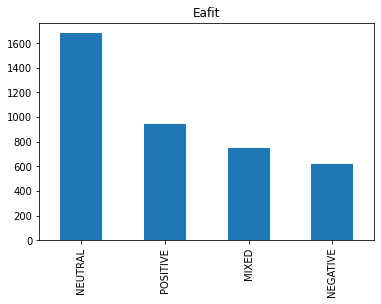

In [99]:
eaffig=eafca.sentimentAWS_WE.value_counts().plot(kind='bar')
eaffig.set_title('Eafit')



Text(0.5, 1.0, 'UPB')

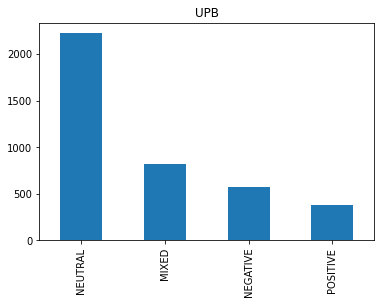

In [100]:
upbfig=upbca.sentimentAWS_WE.value_counts().plot(kind='bar')
upbfig.set_title('UPB')

Text(0.5, 1.0, 'UDEA')

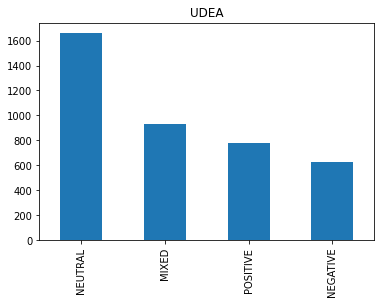

In [101]:
udeafig=udeaca.sentimentAWS_WE.value_counts().plot(kind='bar')
udeafig.set_title('UDEA')

#Traducción de texto

In [107]:
translate = boto3.client(service_name='translate', region_name="us-east-2")

In [106]:
def traducir(string,translate):
  result = translate.translate_text(Text=string,SourceLanguageCode="es", TargetLanguageCode="en")
  return result['TranslatedText']

In [110]:
eafca['Tweet_traducido']=eafca['tweet'].apply(lambda text: traducir(text,translate))

In [112]:
upbca['Tweet_traducido']=upbca['tweet'].apply(lambda text: traducir(text,translate))
udeaca['Tweet_traducido']=udeaca['tweet'].apply(lambda text: traducir(text,translate))

In [115]:
eafca['tweet_wE_traducido']=eafca['Tweet_traducido'].apply(lambda text: emoji.demojize(text,language='en'))
upbca['tweet_wE_traducido']=upbca['Tweet_traducido'].apply(lambda text: emoji.demojize(text,language='en'))
udeaca['tweet_wE_traducido']=udeaca['Tweet_traducido'].apply(lambda text: emoji.demojize(text,language='en'))

# Detección sentimiento con AWS en Inglés

In [17]:
comprehend = boto3.client(service_name='comprehend', region_name="us-east-2")
def detect_Sentiment_AWS_en(comprehend,text):
  try:
    sentiment=comprehend.detect_sentiment(Text=text, LanguageCode='en')
    s=sentiment['Sentiment'][0]+sentiment['Sentiment'][1:].lower()
    return [sentiment['Sentiment'], sentiment['SentimentScore'][s]]
  except:
    print('error teewt: '+text)
    return ['NEUTRAL',1]

In [119]:
eafca['Sent_AWS_WE_EN']=eafca['tweet_wE_traducido'].apply(lambda text: detect_Sentiment_AWS_en(comprehend,text))
upbca['Sent_AWS_WE_EN']=upbca['tweet_wE_traducido'].apply(lambda text: detect_Sentiment_AWS_en(comprehend,text))
udeaca['Sent_AWS_WE_EN']=udeaca['tweet_wE_traducido'].apply(lambda text: detect_Sentiment_AWS_en(comprehend,text))

In [121]:
eafca[['sentimentAWS_WE_EN','polarityAWS_WE_EN']] = pd.DataFrame(eafca.Sent_AWS_WE_EN.tolist(), index= eafca.index)
upbca[['sentimentAWS_WE_EN','polarityAWS_WE_EN']] = pd.DataFrame(upbca.Sent_AWS_WE_EN.tolist(), index= upbca.index)
udeaca[['sentimentAWS_WE_EN','polarityAWS_WE_EN']] = pd.DataFrame(udeaca.Sent_AWS_WE_EN.tolist(), index= udeaca.index)

# Detección con Vader

In [123]:
!pip install twython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 31.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11


In [15]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

In [172]:
def vader(df,columna,columna_sentimiento,columna_valor):
  polarity=[]
  feeling=[]

  for i in range(len(df)):
    try:
      lines_list = tokenize.sent_tokenize(df[columna][i])
      for sentence in lines_list:
        print(sentence)
        sid = SentimentIntensityAnalyzer()
        ss = sid.polarity_scores(sentence)
        del ss['compound']
        maxi=ss['neg']
        key='neg'
        for k in sorted(ss):
          if ss[k] > maxi:
            maxi=ss[k]
            key=k

      if key =='neu':
        key='NEUTRAL'
      elif key=='neg':
        key='NEGATIVE'
      elif key=='pos':
        key='POSITIVE'
      polarity.append(maxi)
      feeling.append(key)
    except:
      polarity.append(0.7)
      feeling.append('NEUTRAL')

  df[columna_sentimiento] = pd.DataFrame(feeling, index= df.index)
  df[columna_valor] = pd.DataFrame(polarity, index= df.index)
  return df



In [ ]:
eafca=vader(eafca,'tweet_wE_traducido','Sent_Valer','polarityValer')
upbca=vader(upbca,'tweet_wE_traducido','Sent_Valer','polarityValer')
udeaca=vader(udeaca,'tweet_wE_traducido','Sent_Valer','polarityValer')

# Análisis de sentimiento con Pipeline

In [7]:
!pip install -q transformers

In [8]:
from transformers import pipeline
sentiment = pipeline(task = 'sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [9]:
def pipeline(df,columna,columna_sentimiento,columna_valor,sentiment):
  polarity=[]
  feeling=[]
  sentiment=sentiment
  for i in range(len(df)):
    try:
      results = sentiment(df[columna][i])
      


      polarity.append(results[0]['score'])
      feeling.append(results[0]['label'])
    except:
      polarity.append(0.7)
      feeling.append('NEUTRAL')

  df[columna_sentimiento] = pd.DataFrame(feeling, index= df.index)
  df[columna_valor] = pd.DataFrame(polarity, index= df.index)
  return df

In [10]:
eafca=pipeline(eafca,'tweet_wE_traducido','Sent_Pipeline','polarityPipeline',sentiment)
upbca=pipeline(upbca,'tweet_wE_traducido','Sent_Pipeline','polarityPipeline',sentiment)
udeaca=pipeline(udeaca,'tweet_wE_traducido','Sent_Pipeline','polarityPipeline',sentiment)

In [11]:
udeaca

Unnamed: 0  Unnamed: 0.1                       date  \
0              0             0  2022-01-29 17:27:59-05:00   
1              1             1  2022-01-29 17:27:14-05:00   
2              2             2  2022-01-29 17:26:09-05:00   
3              3             3  2022-01-29 17:25:48-05:00   
4              4             4  2022-01-29 17:25:40-05:00   
...          ...           ...                        ...   
3987        3995          3995  2021-11-27 11:12:10-05:00   
3988        3996          3996  2021-11-27 10:09:20-05:00   
3989        3997          3997  2021-11-27 09:26:32-05:00   
3990        3998          3998  2021-11-27 09:11:44-05:00   
3991        3999          3999  2021-11-27 08:54:51-05:00   

                                                content      username  \
0     protesta social cinismo terrorismo peso terror...  ConradoMora1   
1     protesta social cinismo terrorismo peso terror...  ConradoMora1   
2     peso terroristas vándalos rechazo total narcot...  ConradoMora1   
3     peso terroristas vándalos rechazo total narcot...  ConradoMora1   
4     peso terroristas vándalos rechazo total narcot...  ConradoMora1   
...                                                 ...           ...   
3987  hoy regresa presencialmente consultorio jurídi...   LuisUrquijo   
3988                           cerro volador cerca udea        jscqui   
3989                                 udea rstaba va ser    loverhalos   
3990                     noche sábado lugar inmejorable       maxgilr   
3991  abril año pasado investigadores udea decían vi...  JavierGzurdo   

                                                 tokens  \
0     ['protesta', 'social', 'cinismo', 'terrorismo'...   
1     ['protesta', 'social', 'cinismo', 'terrorismo'...   
2     ['peso', 'terroristas', 'vándalos', 'rechazo',...   
3     ['peso', 'terroristas', 'vándalos', 'rechazo',...   
4     ['peso', 'terroristas', 'vándalos', 'rechazo',...   
...                                                 ...   
3987  ['hoy', 'regresa', 'presencialmente', 'consult...   
3988              ['cerro', 'volador', 'cerca', 'udea']   
3989                    ['udea', 'rstaba', 'va', 'ser']   
3990        ['noche', 'sábado', 'lugar', 'inmejorable']   
3991  ['abril', 'año', 'pasado', 'investigadores', '...   

                                                 lemmas  \
0     ['protesta', 'social', 'cinismo', 'terrorismo'...   
1     ['protesta', 'social', 'cinismo', 'terrorismo'...   
2     ['peso', 'terrorista', 'vándalo', 'rechazo', '...   
3     ['peso', 'terrorista', 'vándalo', 'rechazo', '...   
4     ['peso', 'terrorista', 'vándalo', 'rechazo', '...   
...                                                 ...   
3987  ['hoy', 'regresar', 'presencialmente', 'consul...   
3988              ['cerro', 'volador', 'cerca', 'udea']   
3989                     ['udea', 'rstar', 'ir', 'ser']   
3990        ['noche', 'sábado', 'lugar', 'inmejorable']   
3991  ['abril', 'año', 'pasado', 'investigador', 'ud...   

                                                  tweet  \
0     protesta social cinismo terrorismo peso terror...   
1     protesta social cinismo terrorismo peso terror...   
2     peso terroristas vándalos rechazo total narcot...   
3     peso terroristas vándalos rechazo total narcot...   
4     peso terroristas vándalos rechazo total narcot...   
...                                                 ...   
3987  hoy regresa presencialmente consultorio jurídi...   
3988                           cerro volador cerca udea   
3989                                 udea rstaba va ser   
3990                     noche sábado lugar inmejorable   
3991  abril año pasado investigadores udea decían vi...   

                                               tweet_wE  \
0     protesta social cinismo terrorismo peso terror...   
1     protesta social cinismo terrorismo peso terror...   
2     peso terroristas vándalos rechazo total narcot...   
3     peso terroristas vándalos r

# Diferencias

In [25]:
eafca_diferencias_tres_modelos=eafca.query('sentimentAWS_WE_EN!=Sent_Valer and sentimentAWS_WE_EN!=Sent_Pipeline')
upbca_diferencias_tres_modelos=upbca.query('sentimentAWS_WE_EN!=Sent_Valer and sentimentAWS_WE_EN!=Sent_Pipeline')
udeaca_diferencias_tres_modelos=udeaca.query('sentimentAWS_WE_EN!=Sent_Valer and sentimentAWS_WE_EN!=Sent_Pipeline')

In [26]:
eafca_diferencias_tres_modelos=eafca_diferencias_tres_modelos.reset_index(drop=True)
upbca_diferencias_tres_modelos=upbca_diferencias_tres_modelos.reset_index(drop=True)
udeaca_diferencias_tres_modelos=udeaca_diferencias_tres_modelos.reset_index(drop=True)

In [31]:
eafca_diferencias_tres_modelos=eafca_diferencias_tres_modelos[0:10]
upbca_diferencias_tres_modelos=upbca_diferencias_tres_modelos[0:10]
udeaca_diferencias_tres_modelos=udeaca_diferencias_tres_modelos[0:10]

In [34]:
def investigar_diferencias_aws(string,comprehend):
  string=string.split()
  res=dict()
  for palabra in string:
    res[palabra]=detect_Sentiment_AWS_en(comprehend,palabra)
  return res

In [35]:
def vader_investigar(string):
  try:
    lines_list = tokenize.sent_tokenize(string)
    for sentence in lines_list:
      print(sentence)
      sid = SentimentIntensityAnalyzer()
      ss = sid.polarity_scores(sentence)
      del ss['compound']
      maxi=ss['neg']
      key='neg'
      for k in sorted(ss):
        if ss[k] > maxi:
          maxi=ss[k]
          key=k

    if key =='neu':
      key='NEUTRAL'
    elif key=='neg':
      key='NEGATIVE'
    elif key=='pos':
      key='POSITIVE'
    return key
  except:

    return 'NEUTRAL'




In [37]:
def investigar_diferencias_vader(string):
  string=string.split()
  res=dict()
  for palabra in string:
    res[palabra]=vader_investigar(palabra)
  return res

In [38]:
def investigar_diferencias_pipeline(string,sentiment):
  string=string.split()
  res=dict()
  for palabra in string:
    results = sentiment(palabra)

    res[palabra]=results[0]['label']
  return res

In [ ]:
eafca_diferencias_tres_modelos['Cada_palabra_sentiment_aws']=eafca_diferencias_tres_modelos['tweet_wE_traducido'].apply(lambda text:investigar_diferencias_aws(text,comprehend))
eafca_diferencias_tres_modelos['Cada_palabra_sentiment_vader']=eafca_diferencias_tres_modelos['tweet_wE_traducido'].apply(lambda text:investigar_diferencias_vader(text))
eafca_diferencias_tres_modelos['Cada_palabra_sentiment_pipeline']=eafca_diferencias_tres_modelos['tweet_wE_traducido'].apply(lambda text:investigar_diferencias_pipeline(text,sentiment))

In [ ]:
upbca_diferencias_tres_modelos['Cada_palabra_sentiment_aws']=upbca_diferencias_tres_modelos['tweet_wE_traducido'].apply(lambda text:investigar_diferencias_aws(text,comprehend))
upbca_diferencias_tres_modelos['Cada_palabra_sentiment_vader']=upbca_diferencias_tres_modelos['tweet_wE_traducido'].apply(lambda text:investigar_diferencias_vader(text))
upbca_diferencias_tres_modelos['Cada_palabra_sentiment_pipeline']=upbca_diferencias_tres_modelos['tweet_wE_traducido'].apply(lambda text:investigar_diferencias_pipeline(text,sentiment))

In [ ]:
udeaca_diferencias_tres_modelos['Cada_palabra_sentiment_aws']=udeaca_diferencias_tres_modelos['tweet_wE_traducido'].apply(lambda text:investigar_diferencias_aws(text,comprehend))
udeaca_diferencias_tres_modelos['Cada_palabra_sentiment_vader']=udeaca_diferencias_tres_modelos['tweet_wE_traducido'].apply(lambda text:investigar_diferencias_vader(text))
udeaca_diferencias_tres_modelos['Cada_palabra_sentiment_pipeline']=udeaca_diferencias_tres_modelos['tweet_wE_traducido'].apply(lambda text:investigar_diferencias_pipeline(text,sentiment))

In [44]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
pd.DataFrame(eafca_diferencias_tres_modelos.loc[1,['Cada_palabra_sentiment_aws','Cada_palabra_sentiment_vader','Cada_palabra_sentiment_pipeline']])

1
Cada_palabra_sentiment_aws       {'best': ['POSITIVE', 0.9331780672073364], 'ma...
Cada_palabra_sentiment_vader     {'best': 'POSITIVE', 'mayor': 'NEUTRAL', 'make...
Cada_palabra_sentiment_pipeline  {'best': 'POSITIVE', 'mayor': 'POSITIVE', 'mak...

# Guardar Info

In [47]:
eafca_diferencias_tres_modelos.to_csv(path+'eafit_listo_analisis_diferencias_tres_modelos.csv')
upbca_diferencias_tres_modelos.to_csv(path+'upb_listo_analisis_diferencias_tres_modelos.csv')
udeaca_diferencias_tres_modelos.to_csv(path+'udea_listo_analisis_diferencias_tres_modelos.csv')

In [ ]:
eafca_diferencias.to_csv(path+'eafit_listo_analisis_diferencias.csv')
upbca_diferencias.to_csv(path+'upb_listo_analisis_diferencias.csv')
udeaca_diferencias.to_csv(path+'udea_listo_analisis_diferencias.csv')

In [14]:
eafca.to_csv(path+'eafit_listo_analisis.csv')
upbca.to_csv(path+'upb_listo_analisis.csv')
udeaca.to_csv(path+'udea_listo_analisis.csv')

In [5]:
path='/content/drive/MyDrive/Trabajo_analisis_sentimiento/'
eafca=pd.read_csv(path+'eafit_listo_analisis.csv')
upbca=pd.read_csv(path+'upb_listo_analisis.csv')
udeaca=pd.read_csv(path+'udea_listo_analisis.csv')